# Testing hypothesis

Does the product of the sum of the squared entries of the two eigenvectors of a 2 x 2 matrix $Q$ equal the square of the product of the trace and determinant of $Q$?   This didn't turn out to be quite right.  The correct version is for a matrix

$$ Q = \begin{pmatrix}A & B \\ C & D \end{pmatrix}$$

the product of the sum of squares of the eigenvector entries formed in the standard way

$$ v = \begin{pmatrix} B \\ \lambda_1 - A\end{pmatrix}, \qquad w = \begin{pmatrix} B \\ \lambda_2 - A\end{pmatrix}$$

is

$$ (v_0^2 + v_1^2)(w_0^2 + w_1^2) = B^2 (A^2 + B^2 + C^2 + D^2 - 2 \det Q).$$

For our particular way of forming $Q$, the right side above is equivalent to 

$$ (\det Q)^2 \left(\left(\mbox{Tr }Q)/ 2 \right)^2 - \det Q\right).$$

The quantity in the right parentheses above is a multiple of the discriminant used in forming the eigenvalues

$$\mbox{disc}(Q) = (\mbox{Tr }Q)^2 - 4 \det Q,$$

hence we can write the expression as 

$$ \frac{1}{4} (\det Q)^2 \mbox{disc}(Q).$$

Even more!  By using $ (\lambda_1 - \lambda_2)^2 = \mbox{disc}(Q)$ and $\lambda_1 \lambda_2 = \det Q$, we finish off with:

$$ \left( \frac{\lambda_1 \lambda_2 (\lambda_1 - \lambda_2)}{2} \right)^2,$$

a truly nice result.  Does this also hold for the arbitrary $Q$?  No, doesn't hold.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_surface
plt.style.use('dark_background')
%matplotlib widget

In [68]:
Q = np.random.rand(2, 2)
A, B, C, D = Q.flatten()[:]

trQ = A + D
detQ = A * D - B * C

disc = np.sqrt(trQ**2 - 4 * detQ)

L1 = (trQ + disc) / 2
L2 = (trQ - disc) / 2

In [69]:
A1 = B
A2 = L1 - A

B1 = A1
B2 = L2 - A

V1 = np.array([A1, A2])
V2 = np.array([B1, B2])

In [70]:
# This cell shows the vectors are eigenvectors
(Q @ V1)  - L1 * V1, (Q @ V2)  - L2 * V2

(array([0.0000000e+00, 6.9388939e-18]),
 array([-2.38524478e-18,  5.63785130e-18]))

In [74]:
sum_sq_prod = (A1**2 + A2**2) * (B1**2 + B2**2)
det_tr_prod = B**2 * (A**2 + B**2 + C**2 + D**2 - 2 * detQ)
expr = L1 * L2 * (L1 - L2) / 2

sum_sq_prod, det_tr_prod, expr**2

(0.01637479814468153, 0.016374798144681534, 3.864390706465211e-07)

Took a while but found the correct version

In [75]:
def trueQcheck(C):
    try:
        len(C)
        C = np.asanyarray(C)
    except TypeError:
        C = np.asanyarray([C])
    A = SlabExact(scale=1e-5, Ts=[6.5, 1, 8, 2.5, 6.5],
          ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
          symmetric=True, wl=6.9e-6,Shift=0)
    M = A.transmission_matrix(C)

    trQs = M[..., 0, 0] * M[..., 1, 0] + \
        M[..., 0, 1] * M[..., 1, 1]
    
    disc = np.sqrt(trQs**2 + 4 * M[..., 0, 0] * M[..., 1, 1],
                   dtype=complex)
    
    L1 = trQs + disc
    L2 = trQs - disc

    A1 = 2 * M[..., 0, 0] * M[..., 1, 1]
    A2 = L1 - 2 * M[..., 0, 0] * M[..., 1, 0]

    B1 = 2 * M[..., 0, 0] * M[..., 1, 1]
    B2 = L2 - 2 * M[..., 0, 0] * M[..., 1, 0]

    trQ = 2 * (M[..., 0, 0] * M[..., 1, 0] + \
        M[..., 0, 1] * M[..., 1, 1])
    
    detQ = -4 * M[..., 0, 0] * M[..., 1, 1]

    expr = L1 * L2 * (L1 - L2) / 2
    return (A1**2 + A2**2) * (B1**2 + B2**2) / (detQ**2 * ((trQ / 2) **2 - detQ))

In [76]:
trueQcheck(.1)

array([1.+9.59110633e-17j])

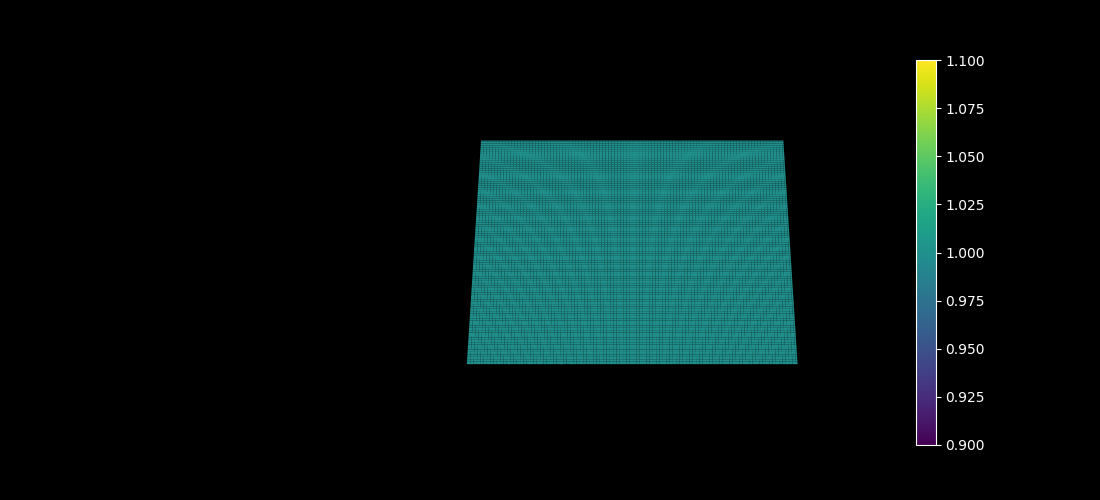

In [77]:
plot_complex_surface(trueQcheck, 0.1, 1, 0.07, .9, iref=200, rref=200)

Well that revised hypothesis also doesn't seem to be correct.  Let's try some sympy work

In [234]:
import sympy as sp

In [235]:
a, b, c, d = sp.symbols('a b c d')
L1, L2 = sp.symbols('lambda_1 lambda_2')

In [236]:
A1 = 2 * a * d
A2 = L1 - 2 * a * c

B1 = A1
B2 = L2 - 2 * a * c

trQ = 2 * (a * c + b * d)
detQ = - 4 * a * d

In [237]:
prod = (A1**2 + A2**2) * (B1**2 + B2**2)

prod = prod.expand()

prod = prod.collect(-4 * a * c**3)
prod = prod.collect(-4 * a * c * d**2)
prod = prod.simplify()
prod = prod.subs(L1 * L2, detQ)
prod = prod.subs(L1 + L2, trQ)
prod = prod.simplify()
prod = prod.collect(4 * c * d)
prod = prod.subs(L1 + L2, trQ)
prod = prod.simplify()
prod = prod.collect(d**2)
prod = prod.collect(c**2)
prod = prod.subs(L1 **2 + L2 **2, trQ**2 - 2 * detQ)
prod = prod.simplify()
prod = prod.subs(b**2 * c**2 + 2 * b * c + 1, (b*c + 1)**2)
prod = prod.subs(b * c + 1, a * d)
prod = prod.simplify()
prod = prod.collect(2 * a * d)
prod = prod.subs(a * d + 1, b * c + 2)
prod = prod / (16 * a**2 * d**2)
prod = prod.expand()
prod = prod - 4 * a * d
prod = prod.factor()
prod = prod + 4 * a * d
prod = prod * (16 * a**2 * d**2)
prod

16*a**2*d**2*(4*a*d + (a*c + b*d)**2)

Okay, from this it looks like the hypothesis I got after checking should be correct, at least for the matrix Q from the leaky mode study.  Next is to go back and check numerics for bugs...?  Actually, let's do the sympy thing to see if the above holds in general.

In [238]:
A, B, C, D = sp.symbols('A B C D')

detQ_symb, trQ_symb = sp.symbols('det(Q) Tr(Q)')

In [239]:
A1 = B
A2 = L1 - A

B1 = B
B2 = L2 - A

trQ = A + D
detQ = A * D - B * C

In [240]:
prod = (A1**2 + A2**2) * (B1**2 + B2**2)

prod = prod.expand()
prod = prod.subs(L1 * L2, detQ)
prod = prod.simplify()
prod = prod.collect(A**2)
prod = prod.collect(B**2)
prod = prod.subs(L1 **2 + L2 **2, trQ**2 - 2 * detQ)
prod = prod.collect(2 * A**3)
prod = prod.collect(2 * A * detQ)
prod = prod.simplify()
prod = prod.subs(L1 + L2, trQ)
prod = prod.simplify()
prod = prod.collect(2 * A)
prod = prod.simplify()
prod = prod.subs(L1 + L2, trQ)
prod = prod.simplify()
# prod = prod.subs(-2 * A * D + 2 * B *C, -2 * detQ_symb)
# prod = prod.collect(2)
prod = prod.subs(C, B)
prod

B**2*(A**2 - 2*A*D + 4*B**2 + D**2)